In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def read_file(idx: int) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    ch1 = pd.read_csv(f"data/F{idx:04}CH1.CSV", header=None)
    ch2 = pd.read_csv(f"data/F{idx:04}CH2.CSV", header=None)
    att1 = float(ch1.at[14, 1])
    att2 = float(ch2.at[14, 1])
    t = ch1[3].to_numpy(np.float64)
    v1 = ch1[4].to_numpy(np.float64) / att1
    v2 = ch2[4].to_numpy(np.float64) / att2
    if idx in (22, 23, 24, 51, 52, 53):
        v1[v1 == -1.024] = np.nan
        v2[v2 == -1.024] = np.nan
    plt.plot(t, v1)
    plt.plot(t, v2)
    plt.savefig(f"elab/{idx}.png")
    plt.close()
    return (t, v1, v2)


files = list(map(read_file, range(54)))
files1 = list(zip(
    [10., 50., 100., 250., 500., 750., 1e3, 75., 125., 150., 175., 200., 155., 160., 165., 170., 1.5e3, 2e3, 10e3, 50e3, 25., 5., 2., 1., 0.1, 0.01],
    files[2:22] + files[48:]
))
files2 = list(zip(
    [0.01, 0.1, 1., 10., 25., 50., 75., 100., 125., 150., 155., 160., 165., 170., 175., 200., 250., 500., 750., 1e3, 2e3, 5e3, 10e3, 50e3, 100e3, 200e3],
    files[22:48]
))

$$\left|\frac{V_\text{out}}{V_\text{in}}\right| = \frac{1}{\sqrt{1 + \omega^2 \tau^2}}$$

# Prima parte

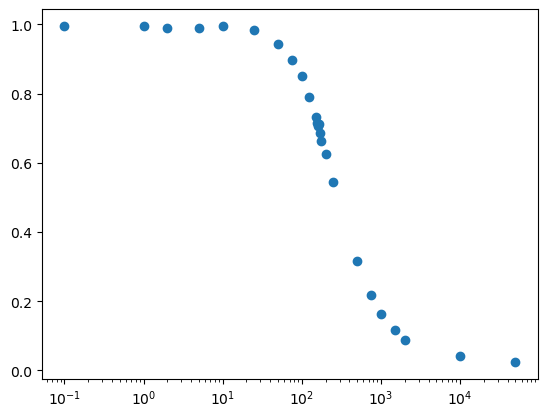

In [20]:
freqs = []
ampiezze = []
for (f, (t, ch1, ch2)) in files1:
    freqs.append(f)
    Vin = ch1.max() - ch1.min()
    Vout = ch2.max() - ch2.min()
    Vout_Vin = Vout / Vin
    ampiezze.append(Vout_Vin)

plt.scatter(freqs, ampiezze)
plt.xscale("log")

$$\varphi = - \arctan\left(\omega \tau\right)$$

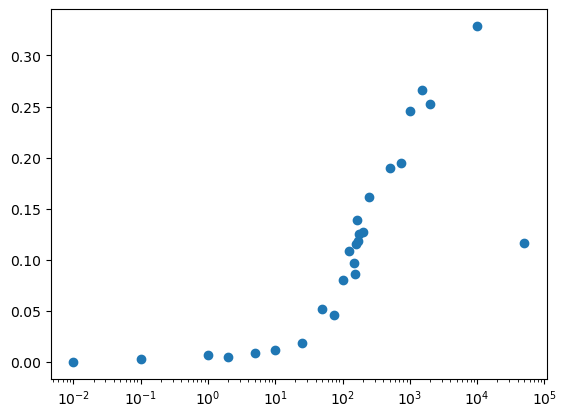

In [21]:
freqs = []
fasi = []
for (f, (t, ch1, ch2)) in files1:
    freqs.append(f)
    fase = (t[ch2.argmax()] - t[ch1.argmax()]) * f
    if fase > 1:
        fase -= 1
    elif fase < 0:
        fase += 1
    fasi.append(fase)

plt.scatter(freqs, fasi)
plt.xscale("log")

# Seconda parte

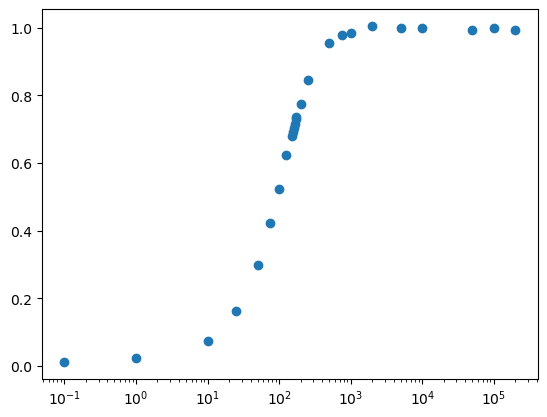

In [22]:
freqs = []
ampiezze = []
for (f, (t, ch1, ch2)) in files2:
    freqs.append(f)
    Vin = ch1.max() - ch1.min()
    Vout = ch2.max() - ch2.min()
    Vout_Vin = Vout / Vin
    ampiezze.append(Vout_Vin)

plt.scatter(freqs, ampiezze)
plt.xscale("log")

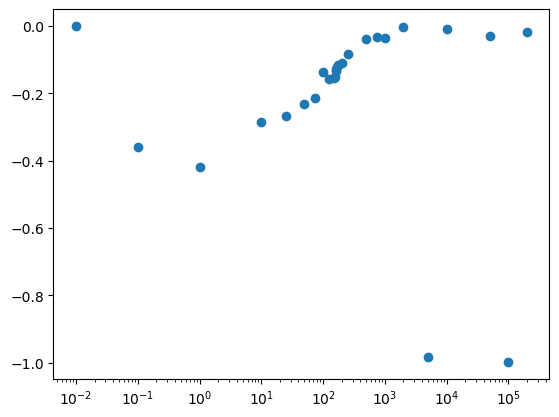

In [23]:
freqs = []
fasi = []
for (f, (t, ch1, ch2)) in files2:
    freqs.append(f)
    fase = (t[ch2.argmax()] - t[ch1.argmax()]) * f
    if fase < -1:
        fase += 1
    elif fase > 0:
        fase -= 1
    fasi.append(fase)

plt.scatter(freqs, fasi)
plt.xscale("log")

# Altro

array([nan, nan, nan, ..., nan, nan, nan])

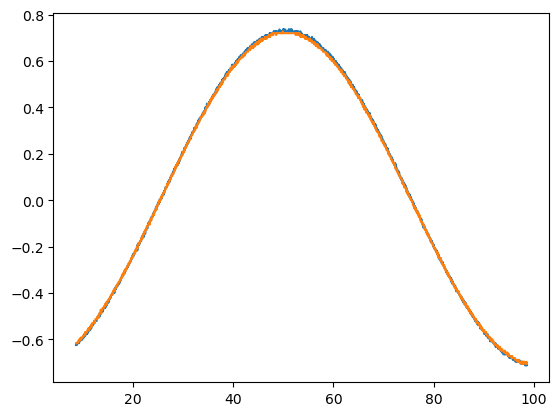

In [24]:
(f, (t, ch1, ch2)) = files1[-1]
plt.plot(t, ch1)
plt.plot(t, ch2)
ch2